# Project #3 - Predictive Analytics on Tapsell's Advertisement Dataset

#### This data is mainly provided for the task of click prediction in Mediaad digital advertising platform. Mediaad shows native ads on website pages. Each webpage has some places that serve the advertisements which is called widgets. Each widget can show single or multiple ads. The goal of this task is to predict whether a user will click on a specific ad or not.

#### In this notebook, you will be instructed to perform several steps of analysis in order to predict whether a user will click on an advertisement or not.

#### Click on <a href="https://drive.google.com/file/d/1tVYbSaG0JdxTLLPSAESnBNvj_RIxKg5B/view?usp=sharing">this link</a> to download the dataset and <a href="https://github.com/tapsellbrain/mediaad-dataset/wiki/Dataset-Description">this link</a> to get more information about the dataset. 

## ➡️&nbsp; Loading The Dataset

**Load `event.csv`, `user_page_view.csv`, `creative.csv`, `click_train.csv`, and `creative_image.csv`. Check for any missing, duplicated, or unrelated values and handle them properly.**

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
event_df = pd.read_csv('./csv_files_2/event.csv')
user_page_view_df = pd.read_csv('./csv_files_2/user_page_view.csv')
creative_df = pd.read_csv('./csv_files_2/creative.csv')
click_train = pd.read_csv('./csv_files_2/click_train.csv')
creative_image = pd.read_csv('./csv_files_2/creative_image.csv')

In [3]:
event_df.sample(5)

,displayId,timestamp,docId,widgetId,userId,device,OS,browser
221725,3863891,1578723049720,1180,4635,2248761,0,0,1
316417,3491164,1578841638987,7294742,607,2052566,0,0,0
894911,1015195,1579699978452,9730179,7691,570532,0,0,8
306111,3542060,1578827545385,7285189,6333,2082264,0,0,10
465018,2899230,1579049715499,71612,13463,1727852,0,0,1


In [4]:
user_page_view_df.sample(5)

,userId,docId,timestamp
24060349,2023359,7856096,1579151435540
62151390,2674649,6369806,1578494034783
29220422,996891,7980236,1579060420459
11490781,848596,8914527,1579402539236
21334026,712714,8307291,1579197063932


In [5]:
creative_df.sample(5)

,creativeId,campaignId,advertiserId
1709,6068,6850,6578
893,6914,5719,1386
190,7660,5918,8414
3031,1385,7613,4015
2332,5420,5901,4439


In [6]:
click_train.sample(5)

,displayId,creativeId,clicked
592545,1938686,6644,0
1976272,3324053,5965,0
479179,1826586,2053,1
2647232,3869157,5447,0
3131249,4320534,5329,0


In [7]:
creative_df.sample(5)

,creativeId,campaignId,advertiserId
2761,3496,4030,4472
911,6896,5918,8414
634,7184,8405,6572
2654,4233,3005,6783
693,7124,2683,5971


In [8]:
print(f'events {"has" if event_df.duplicated().any() else "does not have"} duplicates.')
print(f'user_page_view {"has" if user_page_view_df.duplicated().any() else "does not have"} duplicates.')
print(f'creative {"has" if creative_df.duplicated().any() else "does not have"} duplicates.')
print(f'click_train {"has" if click_train.duplicated().any() else "does not have"} duplicates.')
print(f'creative {"has" if creative_df.duplicated().any() else "does not have"} duplicates.')

events does not have duplicates.
user_page_view has duplicates.
creative does not have duplicates.
click_train does not have duplicates.
creative does not have duplicates.


In [9]:
print(user_page_view_df.duplicated().value_counts())

False    66583551
True       646270
dtype: int64


In [10]:
user_page_view_df.drop_duplicates(keep='first', inplace=True)

In [11]:
print(user_page_view_df.duplicated().value_counts())

False    66583551
dtype: int64


## ➡️&nbsp; EDA

**Find the top five advertisers with the most number of ads. How many advertisement campaigns does each one have?**

In [12]:
top_advertiser = creative_df.advertiserId.value_counts().to_frame()[:5]
top_advertiser

,advertiserId
8414,424
6578,181
2167,137
7903,109
6973,106


In [13]:
top_ad = creative_df[['advertiserId', 'campaignId']].value_counts().to_frame().reset_index().rename(columns={0:'count'})
top_ad.loc[top_ad['advertiserId'].isin(top_advertiser.index)]

,advertiserId,campaignId,count
0,8414,8343,211
1,8414,5918,160
2,6578,6850,48
3,6578,693,37
6,8414,6155,32
13,6578,4227,22
19,6578,2552,18
20,6578,6344,18
21,6578,7270,18
23,7903,4044,17


**Which webpage (`docID`) received the biggest number of clicks? Which ads were displayed on that page?**

In [14]:
merged_event = event_df.merge(click_train, left_on='displayId', right_on='displayId', how='left')
merged_event.dropna(inplace=True)
merged_event

,displayId,timestamp,docId,widgetId,userId,device,OS,browser,creativeId,clicked
0,4706262,1578429005696,3543873,6262,2688642,0,0,0,6.0,1.0
1,4706262,1578429005696,3543873,6262,2688642,0,0,0,15.0,0.0
2,4706262,1578429005696,3543873,6262,2688642,0,0,0,3610.0,0.0
3,4706267,1578429007726,6245475,607,2688641,1,3,0,5279.0,0.0
4,4706267,1578429007726,6245475,607,2688641,1,3,0,5271.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3642239,1328991,1579599210211,20305,10849,781797,0,0,0,7181.0,0.0
3642240,1328991,1579599210211,20305,10849,781797,0,0,0,7182.0,1.0
3642241,1328991,1579599210211,20305,10849,781797,0,0,0,7178.0,0.0
3642242,1328892,1579599211448,233,6746,781793,0,2,2,3614.0,0.0


In [15]:
merged_event[merged_event.clicked==1].docId.value_counts().reset_index().rename(columns={'index':'docId', 'docId':'count'})

,docId,count
0,8116,15322
1,2285483,12532
2,205,6973
3,555,4057
4,163,2877
...,...,...
151718,6665547,1
151719,116894,1
151720,3854073,1
151721,7710169,1


In [16]:
merged_event[merged_event.docId==8116].creativeId.dropna().reset_index().drop(columns={'index'})

,creativeId
0,3344.0
1,2610.0
2,5003.0
3,26.0
4,15.0
...,...
50943,7179.0
50944,6797.0
50945,2404.0
50946,6958.0


**Using `event.csv` and `click_train.csv` tables, find the top 100 users who have clicked on ads more that any other person. What type of device they were using?**

In [17]:
top_users = merged_event[merged_event.clicked==1].userId.value_counts()[:100].to_frame()
top_users

,userId
163374,252
8409,202
26033,202
1356929,153
80354,150
...,...
144065,22
148149,22
949735,22
195597,22


In [18]:
df = merged_event[['device', 'userId']][merged_event['userId'].isin(top_users.index)]
df

,device,userId
8905,1,230821
8906,1,230821
8907,1,230821
8908,1,230821
8909,1,230821
...,...,...
3639108,1,783347
3639109,1,783347
3639110,1,783347
3639111,1,783347


In [19]:
df.groupby('userId').agg('max').device.unique()

array([1, 0, 2])

## ➡️ Coversion Rate

**For each `creativeId` (a unique ID associated with each ad/creative) calculate how many times on average they were clicked on. We refer to this rate as "conversion rate". Draw a histogram of the conversion rates for all creativeId's.**

<AxesSubplot:ylabel='Frequency'>

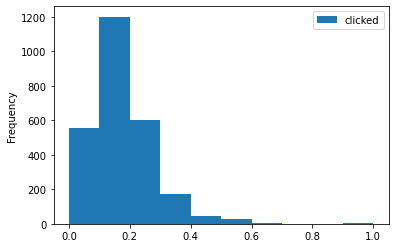

In [20]:
click_train.groupby('creativeId').agg({'clicked':'mean'}).plot.hist()

**For ads displayed to users with different device type (`device` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

<AxesSubplot:xlabel='device'>

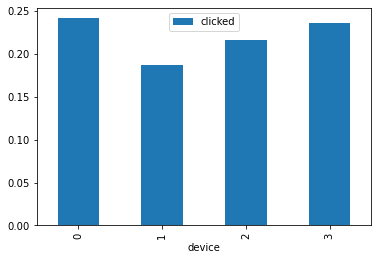

In [21]:
merged_event.groupby('device').agg({'clicked':'mean'}).plot.bar()

**For ads displayed to users with different operating systems (`OS` in `event.csv`) calculated coversion rate? Do you observe any noticable difference between these groups?**

<AxesSubplot:xlabel='OS'>

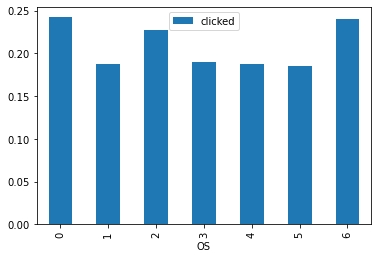

In [22]:
merged_event.groupby('OS').agg({'clicked':'mean'}).plot.bar()

## ➡️ Coversion Rate Prediction

**Using `creative_image.csv` we would like to predict a creativeId's conversion rate given its image features. Create a feature matrix and a target vector. Each row in feature matrix corresponds to a sample in the dataset and each column is associated with a certain feature that is extracted from ad images.**

In [29]:
merged_click = click_train.groupby('creativeId').agg({'clicked':'mean'}).reset_index().merge(creative_image)
merged_click

,creativeId,clicked,imageFeatures
0,6,0.306068,"[0.0, 0.0, 0.04975997656583786, 0.407063782215..."
1,7,0.127535,"[0.10627733916044235, 0.08754178136587143, 3.3..."
2,8,0.236759,"[0.15623298287391663, 0.00098716514185071, 0.0..."
3,11,0.118823,"[0.04297146946191788, 0.01642996445298195, 0.0..."
4,13,0.152334,"[0.14816689491271973, 0.04346756637096405, 1.3..."
...,...,...,...
2611,7177,0.294118,"[0.974502444267273, 0.08183272927999496, 0.077..."
2612,7178,0.189732,"[1.1388229131698608, 0.041852112859487534, 0.0..."
2613,7179,0.141553,"[0.2053901106119156, 0.0146206459030509, 0.0, ..."
2614,7181,0.258048,"[0.27603843808174133, 0.1960456222295761, 0.34..."


In [30]:
import ast

In [31]:
merged_click['image'] = merged_click.imageFeatures.apply(lambda x: ast.literal_eval(x))

In [32]:
merged_click

,creativeId,clicked,imageFeatures,image
0,6,0.306068,"[0.0, 0.0, 0.04975997656583786, 0.407063782215...","[0.0, 0.0, 0.04975997656583786, 0.407063782215..."
1,7,0.127535,"[0.10627733916044235, 0.08754178136587143, 3.3...","[0.10627733916044235, 0.08754178136587143, 3.3..."
2,8,0.236759,"[0.15623298287391663, 0.00098716514185071, 0.0...","[0.15623298287391663, 0.00098716514185071, 0.0..."
3,11,0.118823,"[0.04297146946191788, 0.01642996445298195, 0.0...","[0.04297146946191788, 0.01642996445298195, 0.0..."
4,13,0.152334,"[0.14816689491271973, 0.04346756637096405, 1.3...","[0.14816689491271973, 0.04346756637096405, 1.3..."
...,...,...,...,...
2611,7177,0.294118,"[0.974502444267273, 0.08183272927999496, 0.077...","[0.974502444267273, 0.08183272927999496, 0.077..."
2612,7178,0.189732,"[1.1388229131698608, 0.041852112859487534, 0.0...","[1.1388229131698608, 0.041852112859487534, 0.0..."
2613,7179,0.141553,"[0.2053901106119156, 0.0146206459030509, 0.0, ...","[0.2053901106119156, 0.0146206459030509, 0.0, ..."
2614,7181,0.258048,"[0.27603843808174133, 0.1960456222295761, 0.34...","[0.27603843808174133, 0.1960456222295761, 0.34..."


In [35]:
columns_to_image = list(str(i) for i in range(512))

In [36]:
merged_click[columns_to_image] = pd.DataFrame(merged_click.image.values.tolist(), index=merged_click.index)

/var/folders/x2/qdvgsmy52_38y3bzlmftnz0r0000gn/T/ipykernel_15762/2131499568.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_click[columns_to_image] = pd.DataFrame(merged_click.image.values.tolist(), index=merged_click.index)
/var/folders/x2/qdvgsmy52_38y3bzlmftnz0r0000gn/T/ipykernel_15762/2131499568.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_click[columns_to_image] = pd.DataFrame(merged_click.image.values.tolist(), index=merged_click.index)
/var/folders/x2/qdvgsmy52_38y3bzlmftnz0r0000gn/T/ipykernel_157

In [120]:
merged_click

,creativeId,clicked,imageFeatures,image,0,1,2,3,4,5,...,502,503,504,505,506,507,508,509,510,511
0,6,0.306068,"[0.0, 0.0, 0.04975997656583786, 0.407063782215...","[0.0, 0.0, 0.04975997656583786, 0.407063782215...",0.000000,0.000000,0.049760,0.407064,0.177637,0.071936,...,0.123998,0.454925,0.000000,0.010478,0.205283,0.000000,0.006869,0.366349,0.359391,0.000000
1,7,0.127535,"[0.10627733916044235, 0.08754178136587143, 3.3...","[0.10627733916044235, 0.08754178136587143, 3.3...",0.106277,0.087542,3.344223,0.645454,1.301556,0.121954,...,0.938022,0.733772,0.000000,1.211627,0.486232,0.000000,0.118570,0.079808,0.159126,0.012901
2,8,0.236759,"[0.15623298287391663, 0.00098716514185071, 0.0...","[0.15623298287391663, 0.00098716514185071, 0.0...",0.156233,0.000987,0.014774,0.207742,0.038036,0.011584,...,0.000000,0.000000,0.000000,0.441291,0.193914,0.639011,0.046036,0.000000,0.061070,0.125147
3,11,0.118823,"[0.04297146946191788, 0.01642996445298195, 0.0...","[0.04297146946191788, 0.01642996445298195, 0.0...",0.042971,0.016430,0.070029,0.000000,0.562984,0.223415,...,0.058076,0.099905,1.024207,0.749125,0.017977,1.022663,2.738049,0.022185,0.135937,0.710172
4,13,0.152334,"[0.14816689491271973, 0.04346756637096405, 1.3...","[0.14816689491271973, 0.04346756637096405, 1.3...",0.148167,0.043468,1.341706,1.226016,0.379946,0.173325,...,0.693747,0.011229,0.093873,0.353185,0.941742,0.000000,0.555764,0.223577,0.071369,0.018053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2611,7177,0.294118,"[0.974502444267273, 0.08183272927999496, 0.077...","[0.974502444267273, 0.08183272927999496, 0.077...",0.974502,0.081833,0.077752,0.101681,0.560510,0.043694,...,0.106524,0.061194,0.234053,2.097951,0.974011,1.424949,0.100139,0.000000,0.537639,0.229753
2612,7178,0.189732,"[1.1388229131698608, 0.041852112859487534, 0.0...","[1.1388229131698608, 0.041852112859487534, 0.0...",1.138823,0.041852,0.000385,0.035156,0.377168,0.123878,...,0.048359,0.143126,0.506860,1.717038,0.500506,0.601653,0.292321,0.000000,0.811480,0.247876
2613,7179,0.141553,"[0.2053901106119156, 0.0146206459030509, 0.0, ...","[0.2053901106119156, 0.0146206459030509, 0.0, ...",0.205390,0.014621,0.000000,0.006130,0.136217,0.007052,...,0.063945,0.139984,0.935905,0.000000,0.025835,0.086115,0.043867,0.287675,0.443077,0.018351
2614,7181,0.258048,"[0.27603843808174133, 0.1960456222295761, 0.34...","[0.27603843808174133, 0.1960456222295761, 0.34...",0.276038,0.196046,0.345296,0.002765,0.730500,0.070100,...,0.024766,0.006101,0.726778,1.002823,0.455943,0.934827,1.201000,0.000000,0.361049,0.691181


**Use a linear regression model to predict conversion rate given image features for each creativeId. Evaluate your model's performance using 5-fold cross-validation. Does adding polynomial features boost the performance? Use mean-squared-error as your evaluation metric.**

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [50]:
from sklearn.model_selection import cross_validate

In [40]:
Xcols = list(str(i) for i in range(512))
X = merged_click[Xcols]

In [42]:
y = merged_click.clicked

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train)
mse(y_true= y_train, y_pred= y_train_pred)

0.007249852389092332

In [47]:
y_test_pred = model.predict(X_test)
mse(y_true= y_test, y_pred= y_test_pred)

0.012657386449812971

In [80]:
cross_validate(LinearRegression(), X, y, scoring='neg_mean_squared_error', return_train_score=True)

{'fit_time': array([0.24662018, 0.17080498, 0.18853354, 0.1835289 , 0.20858192]),
 'score_time': array([0.00377488, 0.00359702, 0.00445127, 0.00382376, 0.00370789]),
 'test_score': array([-0.01169777, -0.01203998, -0.0153628 , -0.01899761, -0.01504425]),
 'train_score': array([-0.00761862, -0.00752271, -0.00722825, -0.00623031, -0.00705742])}

In [88]:
poly = PolynomialFeatures(2)
poly_features = poly.fit_transform(X_train)
model = LinearRegression().fit(poly_features, y_train)
mse(y_true= y_train, y_pred= model.predict(poly.fit_transform(X_train)))

0.0013422067385097318

In [89]:
poly_features = poly.fit_transform(X_test)
model = LinearRegression().fit(poly_features, y_test)
mse(y_true= y_test, y_pred= model.predict(poly.fit_transform(X_test)))

0.0023152707512565877

**Find a subset of image features that contain the most amount of information about the target values. You may use correlation matrix for this purpose.**

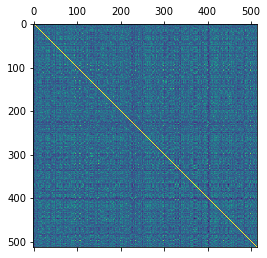

In [64]:
plt.matshow(merged_click[Xcols+['clicked']].corr().to_numpy())

In [92]:
merged_click[Xcols+['clicked']].corr().to_numpy()[-1, :512].argsort()[-20:]

array([170, 133, 195, 474, 305, 365, 129, 319, 469, 336, 333, 404, 495,
       373, 394, 230, 136, 122, 287, 114])

**Apply PCA on image features. Plot a diagram to depict variance accross each calculated principle componenet. Choose a few principle components along which image features has to larget variance.**

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [67]:
f1 = pca.transform(X)

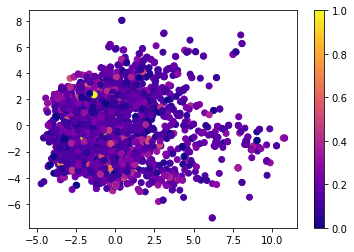

In [75]:
plt.scatter(f1[:,0], f1[:,1], c=y, cmap='plasma')
plt.colorbar()

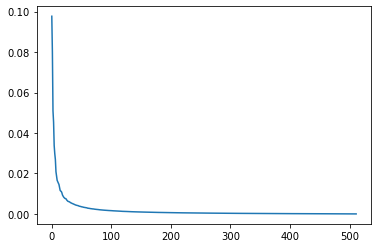

In [104]:
pca = PCA()
pca.fit(X_train)
plt.plot(range(512), pca.explained_variance_ratio_)

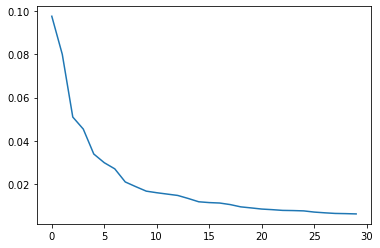

In [105]:
plt.plot(range(30), pca.explained_variance_ratio_[:30])

In [114]:
pca = PCA(n_components=20)
X_prime_train = pca.fit_transform(X_train)
X_prime_test = pca.fit_transform(X_test)

**Construct a linear regression model and fit the model on the transformed image features you calculated previously. Evaluate your model's performance using 5-fold cross-validation. Does transforming data using PCA help increase model's performance?**

In [115]:
model = LinearRegression()
model.fit(X_prime_train, y_train)

LinearRegression()

In [116]:
y_predict = model.predict(X_prime_train)
mse(y_train, y_predict)

0.011397763187077931

In [117]:
model.fit(X_prime_test, y_test)

LinearRegression()

In [118]:
y_predict = model.predict(X_prime_test)
mse(y_test, y_predict)

0.00946164380430712